In [1]:
import tensorflow as tf


2025-01-18 08:28:32.161425: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-18 08:28:35.099188: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737188916.206109     600 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737188916.476052     600 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-18 08:28:40.016464: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [401]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [402]:
#train_datagen= ImageDataGenerator(rescale=1./255,shear_range=0.1,zoom_range=0.1,horizontal_flip=True)
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    horizontal_flip=True,
    fill_mode='nearest',
)

In [403]:
train_set= train_datagen.flow_from_directory("/mnt/c/MyEverything/PythonProjects/Recent_projects/cnn_analysis/MiniProjectCNN/Dataset/train", 
                                             target_size =(100,100),batch_size=32,class_mode='binary')

Found 202 images belonging to 2 classes.


In [404]:
test_datagen= ImageDataGenerator(rescale=1./255)
test_set= test_datagen.flow_from_directory("/mnt/c/MyEverything/PythonProjects/Recent_projects/cnn_analysis/MiniProjectCNN/Dataset/test", 
                                           target_size= (100,100), batch_size = 32, class_mode = 'binary')


Found 44 images belonging to 2 classes.


In [405]:
cnn = tf.keras.models.Sequential()

In [406]:
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 5, activation = 'relu', input_shape= [ 100, 100, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 5, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

/mnt/c/Windows/system32/tf_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [407]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [408]:
print("Class Indices:", train_set.class_indices)
print("Number of Classes:", train_set.num_classes)
print("Number of Classes:", test_set.num_classes)
print("Model Output Shape:", cnn.output_shape)

Class Indices: {'Defect_images': 0, 'NODefect_images': 1}
Number of Classes: 2
Number of Classes: 2
Model Output Shape: (None, 1)


In [423]:
import time
start_time = time.time()

with tf.device('/GPU:0'):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8,restore_best_weights=True)
    history = cnn.fit(train_set, validation_data=test_set, epochs=50, callbacks=[early_stopping])
    #cnn.fit(x=train_set, validation_data=test_set, epochs=50)
    cnn.evaluate(test_set)

end_time = time.time()
print(f"Time taken for epoch: {end_time - start_time} seconds")


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 420ms/step - accuracy: 0.6316 - loss: 0.6281 - val_accuracy: 0.5227 - val_loss: 0.7303
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 397ms/step - accuracy: 0.6853 - loss: 0.6380 - val_accuracy: 0.6591 - val_loss: 0.6521
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 356ms/step - accuracy: 0.6876 - loss: 0.6267 - val_accuracy: 0.5227 - val_loss: 0.7521
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 347ms/step - accuracy: 0.6543 - loss: 0.6477 - val_accuracy: 0.6136 - val_loss: 0.6929
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 377ms/step - accuracy: 0.5968 - loss: 0.6628 - val_accuracy: 0.6364 - val_loss: 0.6806
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 377ms/step - accuracy: 0.6525 - loss: 0.6387 - val_accuracy: 0.6136 - val_loss: 0.6994
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 355ms/step - accuracy: 0.6428 - loss: 0.6462 - val_accuracy: 0.7045 - val_loss: 0.6508
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 377ms/step - accuracy: 0.5955 - loss: 0.6523 - val_accuracy: 0.6364 - val_loss:

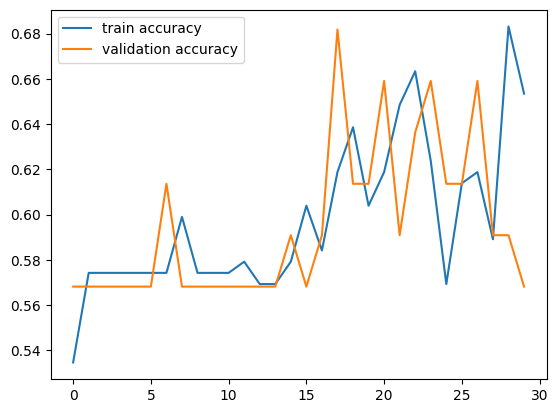

In [410]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [424]:
import numpy as np
from keras.preprocessing import image
test_images=[]

test_image = image.load_img('/mnt/c/MyEverything/PythonProjects/Recent_projects/cnn_analysis/MiniProjectCNN/Dataset/sample_img/img1.png', target_size=(100, 100))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image /= 255.0
test_images.append(test_image)

In [425]:
test_preds=[]

result = cnn.predict(test_image)
print("result:",result[0][0],end='\n\n')
predicted_class_index = 0 if result[0][0] <0.5 else 1
print('predicted class index:', predicted_class_index,'\n\n')
class_labels = {v: k for k, v in train_set.class_indices.items()}
prediction = class_labels[predicted_class_index]
print(f"Predicted class: {prediction}")
test_preds.append(prediction)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
result: 0.24365836

predicted class index: 0 


Predicted class: Defect_images


In [426]:
# import pickle
# with open('first_cnn_try.pkl', 'wb') as f:
#     pickle.dump(cnn, f)
#     print("Model saved!")

cnn.save('first_cnn_try.h5')

In [427]:
class_labels = {v: k for k, v in train_set.class_indices.items()}
print("Class Labels:", class_labels)


Class Labels: {0: 'Defect_images', 1: 'NODefect_images'}


In [428]:
# with open('first_cnn_try.pkl', 'rb') as f:
#     loaded_cnn = pickle.load(f)
loaded_cnn = tf.keras.models.load_model('first_cnn_try.h5')
result = loaded_cnn.predict(test_image)
print("predicted:",result[0][0])
predicted_class_index = 0 if result[0][0] <0.5 else 1
class_labels = {v: k for k, v in train_set.class_indices.items()}
prediction = class_labels[predicted_class_index]

print(f"Predicted class: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
predicted: 0.24365836
Predicted class: Defect_images


In [429]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
import seaborn as sns


In [430]:
true_labels = test_set.classes
predictions = cnn.predict(test_set)
predicted_labels = [1 if pred >= 0.5 else 0 for pred in predictions.flatten()]

print(predicted_labels)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step 
[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1]


Confusion Matrix:
 [[ 6 13]
 [ 7 18]]

Classification Report:
                  precision    recall  f1-score   support

  Defect_images       0.46      0.32      0.38        19
NODefect_images       0.58      0.72      0.64        25

       accuracy                           0.55        44
      macro avg       0.52      0.52      0.51        44
   weighted avg       0.53      0.55      0.53        44


F1 Score: 0.53
Precision: 0.53
Recall: 0.55


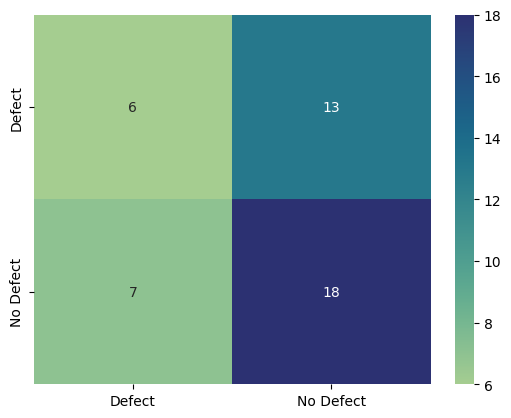

In [431]:

cm = confusion_matrix(true_labels, predicted_labels)
sns.heatmap(cm,annot=True,xticklabels=['Defect','No Defect'],yticklabels=['Defect','No Defect'],cmap="crest")
report = classification_report(true_labels, predicted_labels, target_names=train_set.class_indices.keys())

f1 = f1_score(true_labels, predicted_labels, average='weighted')
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')

print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)
print(f"\nF1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
